In [1]:
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where

In [2]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [3]:
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

In [7]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [8]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.312, Test: 0.318


In [ ]:
# In this case, we can see that for this problem and the chosen model configuration, the hinge
# squared loss may not be appropriate, resulting in classification accuracy of less than 70% on the
# train and test sets.

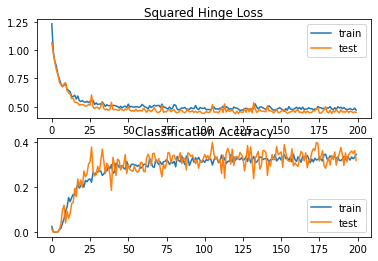

In [9]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Squared Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
'''The plot of loss shows that indeed, the model converged, but the shape
of the error surface is not as smooth as other loss functions where small changes to the weights
are causing large changes in loss.'''